In [1]:
import os, sys, glob
# sys.path.append(os.path.abspath('../'))

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

from pivpy import io, pivpy, graphics


In [2]:
xr.set_options(keep_attrs=True)

In [3]:
dirs = sorted(glob.glob('../res/Open_PIV_results_8_*'))

In [4]:
tmp = []
for d in dirs:
    tmp.append(io.load_txt(os.path.join(d,'field_A000.txt'),variables=['x','y','u','v']))
    
# concatenate into single dataset
data = xr.concat(tmp, dim='t')
data.attrs['variables'] = tmp[0].attrs['variables']
data.attrs['units'] = tmp[0].attrs['units']
data.attrs['dt'] = tmp[0].attrs['dt']
data.attrs['units']=['pix','pix','pix/dt','pix/dt']
data.attrs['files'] = [t.attrs['files'] for t in tmp]

data['t'] = np.arange(len(dirs))

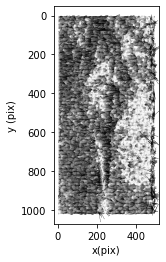

In [5]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=2, arrScale=5)

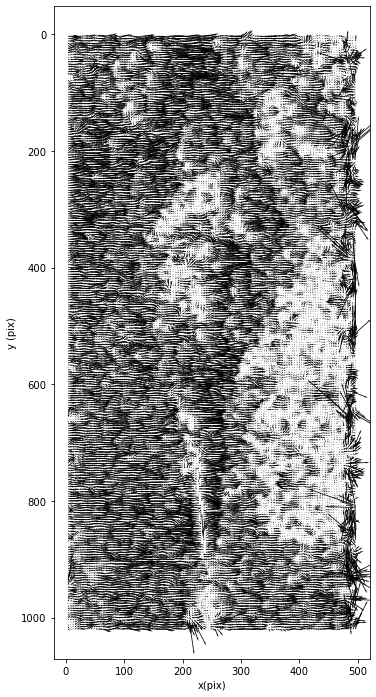

In [6]:
data.piv.vec2scal(property="curl"); # it will appear as d['w'] variable, 'w' for all scalar properties
# fig, ax = graphics.contour_plot(data)
fig, ax = graphics.quiver(data.isel(t=0), nthArr=2, arrScale=5)
fig.set_size_inches(12,12)

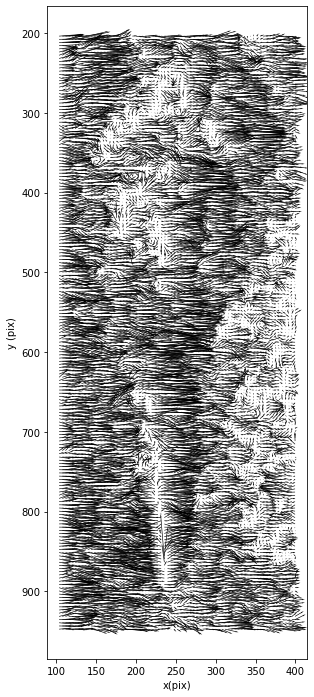

In [8]:
# tmp = data.piv.crop(crop_vector=[100,400,200,950])
# tmp = data.sel(x=slice(100,400),y=slice(200,950))
data = data.piv.crop(crop_vector=[150,350,250,900])
fig, ax = graphics.quiver(data.isel(t=0), nthArr=2, arrScale=5)
fig.set_size_inches(12,12)

In [35]:
data.piv.divergence()

<xarray.Dataset>
Dimensions:  (t: 30, x: 75, y: 187)
Coordinates:
  * x        (x) float64 103.5 107.5 111.5 115.5 ... 387.5 391.5 395.5 399.5
  * y        (y) float64 203.5 207.5 211.5 215.5 ... 935.5 939.5 943.5 947.5
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 ... 20 21 22 23 24 25 26 27 28 29
Data variables:
    u        (x, y, t) float64 0.361 0.2627 0.2787 ... 0.1705 0.1436 0.2212
    v        (x, y, t) float64 -0.028 -0.0545 -0.0558 ... 0.0074 -0.0416 0.0303
    chc      (x, y, t) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    w        (x, y, t) float64 -0.00325 0.00735 0.00535 ... -0.005125 -0.003975
Attributes:
    variables:  ['x', 'y', 'u', 'v', 'vorticity']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt', '1/dt']
    dt:         None
    files:      ['../res/Open_PIV_results_8_000001/field_A000.txt', '../res/O...

/home/user/miniconda3/envs/bospiv/lib/python3.7/site-packages/xarray/core/nputils.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/user/miniconda3/envs/bospiv/lib/python3.7/site-packages/xarray/core/nputils.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


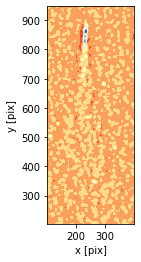

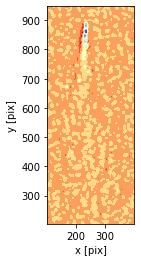

In [37]:
# data.piv.vorticity()
fig, ax = graphics.contour_plot(data.isel(t=29))
fig, ax = graphics.contour_plot(data.isel(t=0))

In [17]:
data.piv.vorticity()
for t in data.t.values[:10]:
    ux,_ = np.gradient(data.isel(t=t).u.T,data.x,data.y,axis=(0,1))
    fig, ax = plt.subplots()
    # fig, ax = graphics.contour_plot(data.isel(t=t))
    # ax.axis('off')
    ax.contourf(data.x,data.y,ux)
    # fig.savefig(f'../vort/{t}.png',dpi=150,bbox_inches='tight', pad_inches=0)
    plt.show()

ValueError: when 1d, distances must match the length of the corresponding dimension

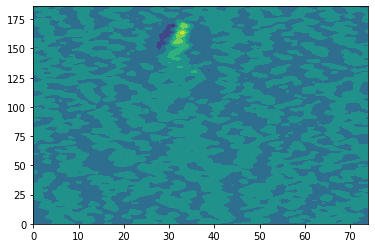

In [27]:
plt.contourf(np.gradient(data.isel(t=t).u.T,axis=1))

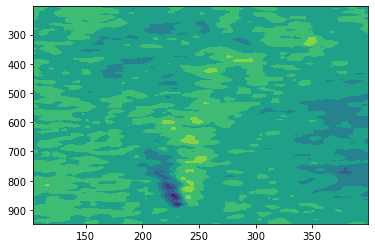

In [34]:
fig, ax = plt.subplots()
ax.contourf(data.x,data.y,data.isel(t=t).u.T,)
ax.invert_yaxis()

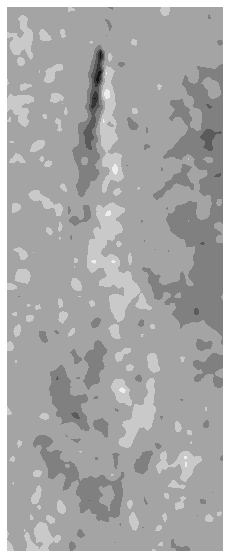

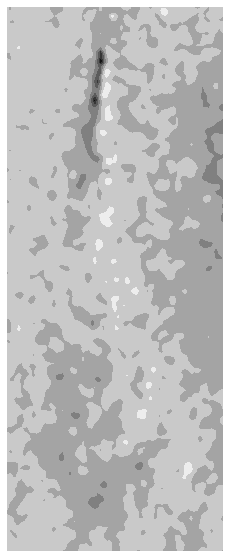

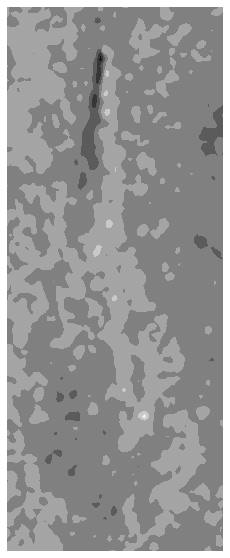

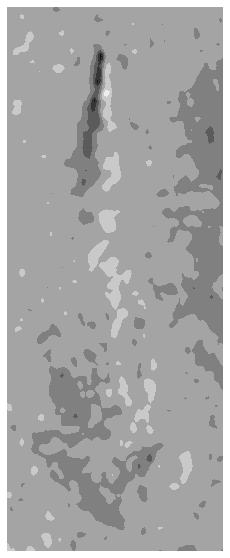

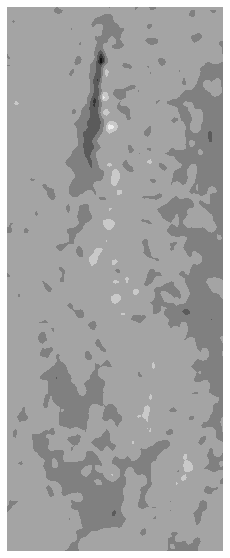

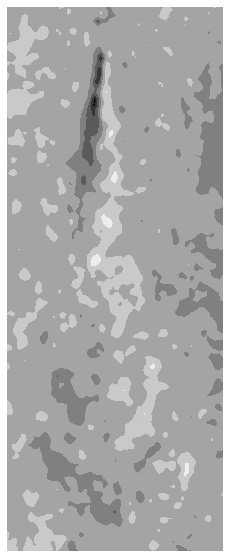

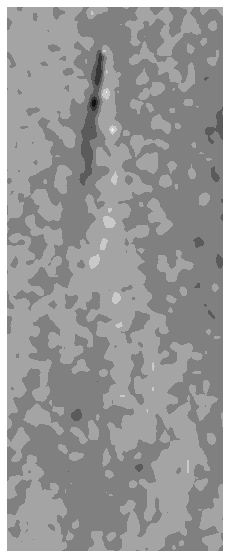

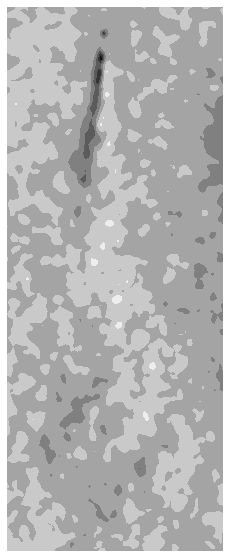

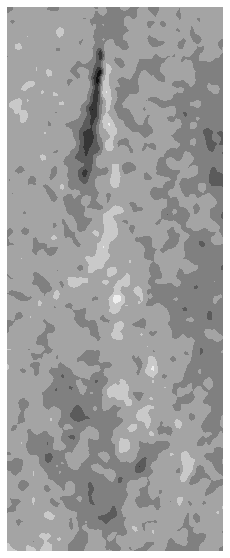

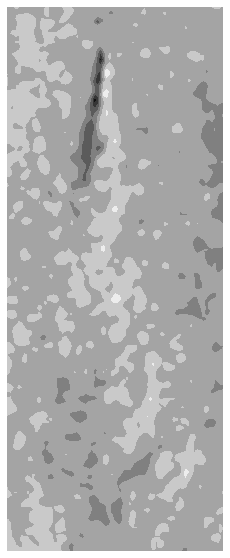

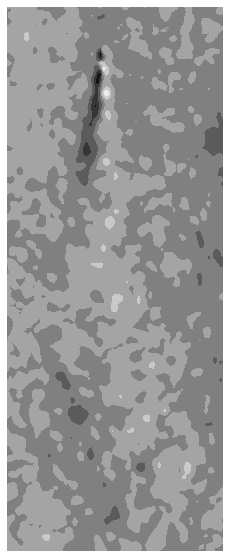

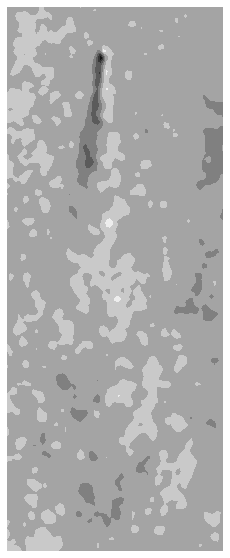

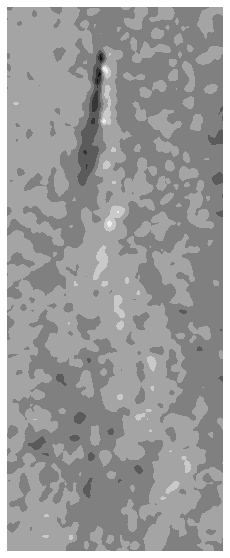

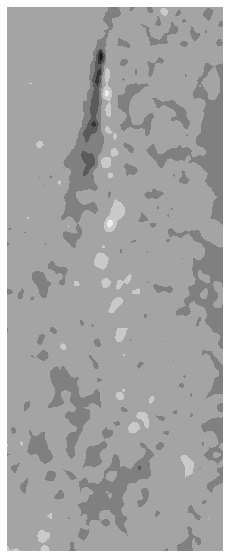

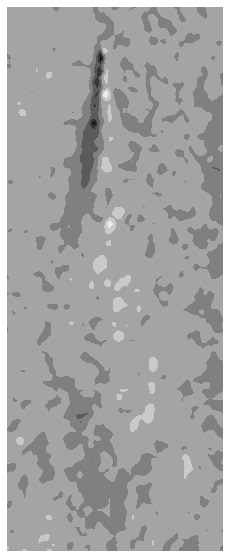

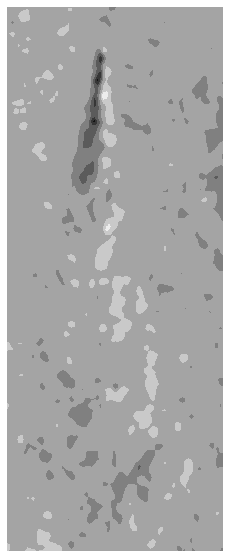

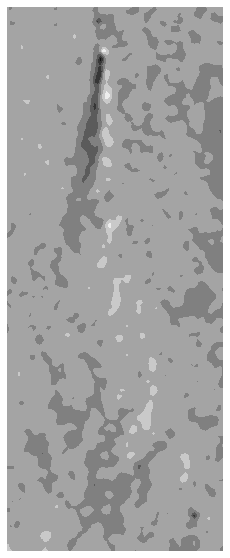

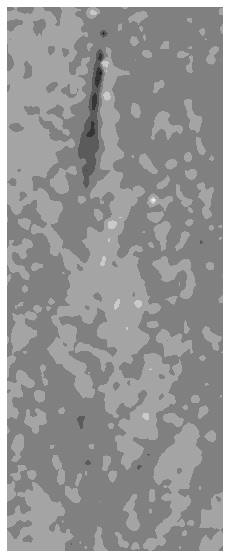

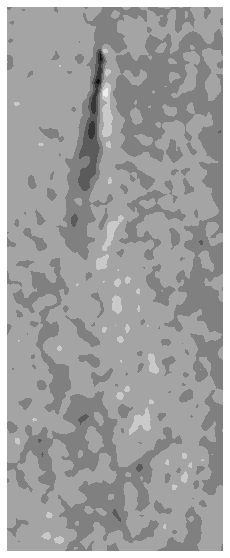

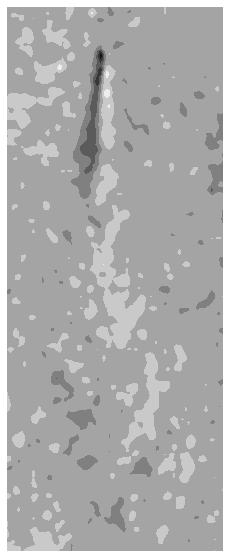

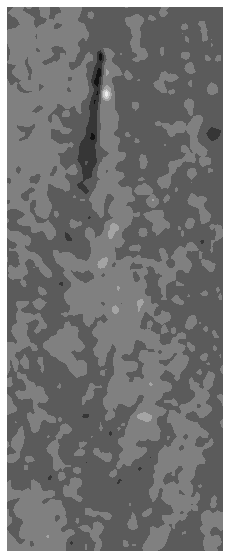

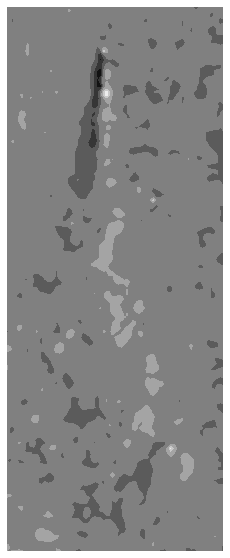

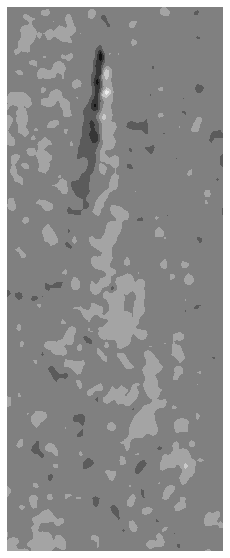

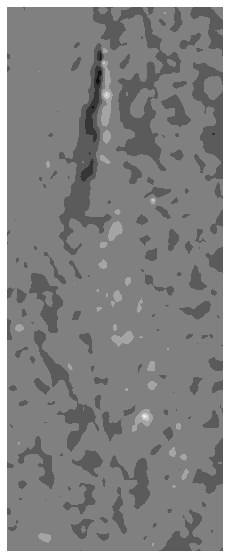

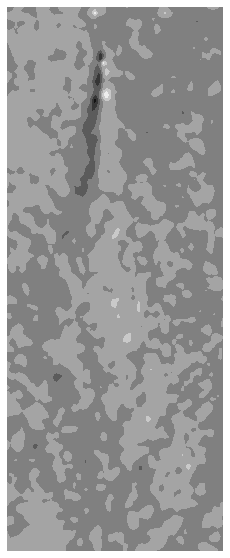

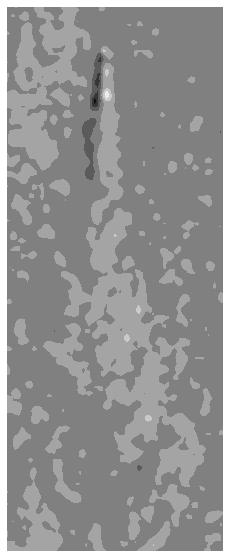

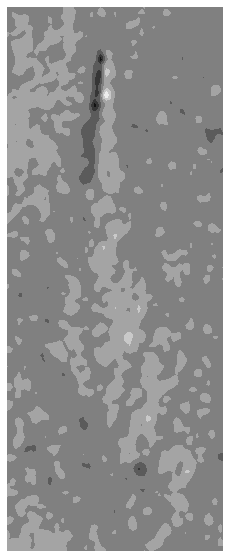

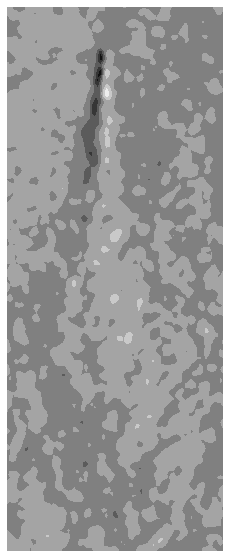

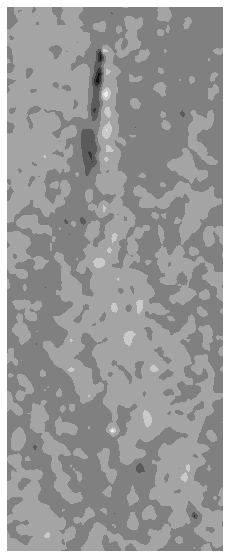

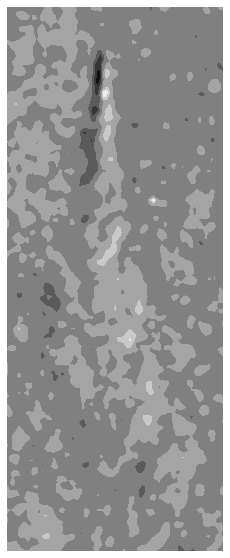

In [51]:
for t in data.t.values:
    # ux,_ = np.gradient(data.isel(t=t).u.T,data.x,data.y,axis=(0,1))
    fig, ax = plt.subplots(figsize=(5,10))
    # fig, ax = graphics.contour_plot(data.isel(t=t))
    u = data.isel(t=t).u.T
    u -= u.min()
    u /= u.max()
    
    ax.contourf(data.x,data.y,u,cmap=plt.cm.gray)
    ax.set_aspect(1)
    ax.axis('off')
    # ax.contourf(data.x,data.y,ux)
    fig.savefig(f'../u/{t}.png',dpi=200,bbox_inches='tight', pad_inches=0)
    plt.show()